# Pymaceuticals Inc.
---


In [131]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merged_df = study_results.merge(mouse_metadata, on = 'Mouse ID')
# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [132]:
# Checking the number of mice.
number_mice={'Number of Mice':[len(merged_df['Mouse ID'].value_counts())]}
number_mice=pd.DataFrame(number_mice)
number_mice

,Number of Mice
0,249


In [133]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
drop_dup_mouse_id = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
drop_dup_mouse_id

array(['g989'], dtype=object)

In [134]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ID=merged_df[merged_df["Mouse ID"]== 'g989'] 
duplicate_mouse_ID


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [135]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merged_df[merged_df['Mouse ID'].isin(drop_dup_mouse_id)==False]
clean_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [136]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice={'Clean_Number of Mice':[len(clean_mouse_df['Mouse ID'].value_counts())]}
clean_number_mice=pd.DataFrame(clean_number_mice)
clean_number_mice

,Clean_Number of Mice
0,248


## Summary Statistics

In [114]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mr_df=clean_mouse_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
mean=mr_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=mr_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=mr_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=mr_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=mr_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

analysis_df=pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":variance, "umor Volume Std. Dev.": sd, "umor Volume Std. Err.": sem})
analysis_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,umor Volume Std. Dev.,umor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Count of Unique Mice')

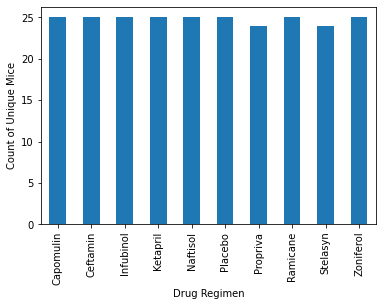

In [115]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Create a DataFrame of unique mouse IDs and drug regimen.
# Group DataFrame by drug regimen and get a count of unique mice for each drug.
Bar_data=clean_mouse_df.groupby('Drug Regimen').nunique()['Mouse ID']
Bar_data_df=Bar_data.plot.bar()
Bar_data_df.set_xlabel('Drug Regimen')
Bar_data_df.set_ylabel('Count of Unique Mice')


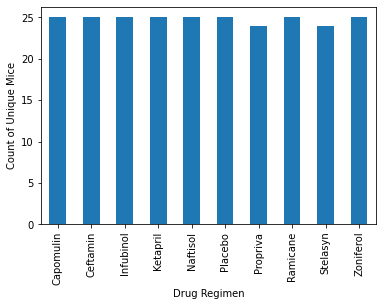

In [116]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
Bar_data=clean_mouse_df.groupby('Drug Regimen').nunique()['Mouse ID']
Bar_data_df=pd.DataFrame(Bar_data)
Bar_data_df.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Unique Mice')
plt.show()

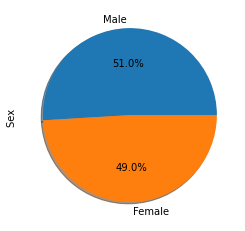

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pandas_pie_data=clean_mouse_df["Sex"].value_counts()

#Labels for each section
labels=pandas_pie_data.values

#Values of each section 
sizes=pandas_pie_data.values

#Make into a pie chart
pandas_pie_data.plot(kind="pie", autopct="%1.1f%%", shadow=True)

#Formatting
plt.ylabel("Sex ")
plt.show()

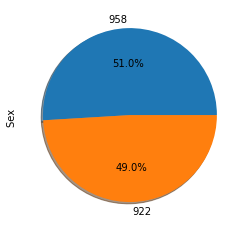

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pyplot_pie_data=clean_mouse_df.groupby('Sex').nunique()['Mouse ID']
pyplot_pie_df=pd.DataFrame(pyplot_pie_data)

#Labels for each section
labels=pandas_pie_data.values

#Values of each section 
sizes=pandas_pie_data.values

plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True)
plt.ylabel("Sex ")
plt.show()

## Quartiles, Outliers and Boxplots

In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint= clean_mouse_df.groupby('Mouse ID').max()['Timepoint']
final_timepoint_df=pd.DataFrame(final_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_study_df=pd.merge(final_timepoint_df, clean_mouse_df, on=('Mouse ID','Timepoint'))
merged_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    # add subset
    
    # Determine outliers using upper and lower bounds

capomulin= merged_mouse_study_df.loc[merged_mouse_study_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merged_mouse_study_df.loc[merged_mouse_study_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merged_mouse_study_df.loc[merged_mouse_study_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merged_mouse_study_df.loc[merged_mouse_study_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin quartiles
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Infubionol Outliers
lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)

#Ramicane quartiles
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram
#Ramicane Outliers
lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)

#Infubionol quartiles
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in= quartile_in[.25]
upper_in=quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)

#Ceftmain quartiles
quartile_ce=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ce[.25]
upper_ce=quartile_ce[.75]
iqr= upper_ce-lower_ce
#Ceftmain Outliers
lower_oce= lower_ce-(1.5*iqr)
upper_oce= upper_ce+(1.5*iqr)


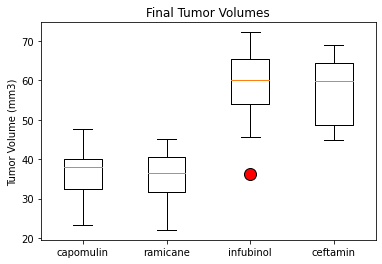

In [123]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= orange_out)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

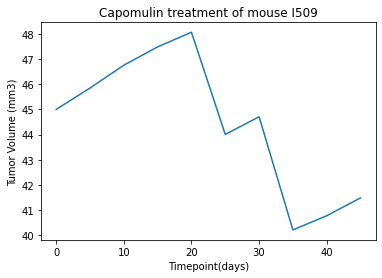

In [124]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_plot= clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin']
mouse= clean_mouse_df.loc[clean_mouse_df['Mouse ID'] == 'l509']



plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")
plt.show()

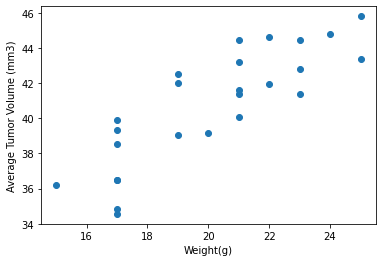

In [125]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight= clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

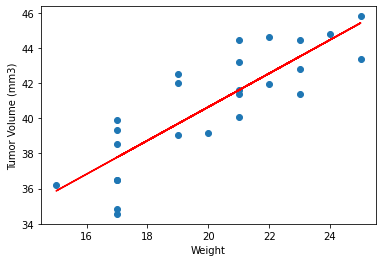

Correlation between these two variables is 0.84


In [130]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

print(f"Correlation between these two variables is {round(rvalue,2)}")